# Map of the granparents country of birth (1 c)

In [1]:
import os

os.chdir('HPP_resource\\Figure1')

In [1]:
import lightgbm as lgb
lgb.__version__

'4.5.0'

<Figure size 1062.99x531.496 with 0 Axes>

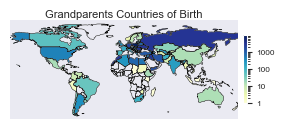

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 7  # Global font size
plt.rcParams['axes.titlesize'] = 7  # Title font size
plt.rcParams['axes.labelsize'] = 7  # Axis label font size
plt.rcParams['xtick.labelsize'] = 6  # X-tick font size
plt.rcParams['ytick.labelsize'] = 6  # Y-tick font size
plt.rcParams['legend.fontsize'] = 6  # Legend font size
plt.rcParams['figure.titlesize'] = 7  # Figure title font size

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
import numpy as np

countries_10k = pd.read_csv('participants_countries_grandparents.csv') #### reported grandmapents country of birth
world = gpd.read_file('ne_110m_admin_0_countries.shp') ####map template
countries_list=countries_10k[[c for c in countries_10k.columns if 'country' in c.lower() and 'grand' in c.lower()]].values.flatten().tolist()
len(countries_list)

country_counts = {}
for country in countries_list:
    country_counts[country] = country_counts.get(country, 0) + 1
country_counts['United States of America'] = country_counts['United States']
# Add the frequency information to the shapefile
world['Frequency'] = world['NAME'].map(country_counts)
world['Frequency'] = world['Frequency'].fillna(0)

# Create a LogNorm object for the colormap
min_value = world['Frequency'][world['Frequency'] > 0].min()
max_value = world['Frequency'].max()
norm = LogNorm(vmin=min_value, vmax=max_value)

# Set the figure size to 180 mm width at 300 dpi
width_inches = 90 / 25.4  # convert mm to inches
height_inches = width_inches / 2  # adjust this ratio as needed
plt.figure(figsize=(width_inches, height_inches), dpi=300)

# Plot the map with heatmap
fig, ax = plt.subplots(figsize=(width_inches, height_inches))

# Plot country boundaries
world.boundary.plot(ax=ax, color='black', linewidth=0.3)
plot = world.plot(column='Frequency', cmap='YlGnBu', norm=norm, linewidth=0.3, edgecolor='0.8', 
                  legend=True, 
                  legend_kwds={'label': '', 'format': '{x:.0f}', 'shrink': 0.5, 'pad': 0.02}, 
                  ax=ax)

# Set the limits to exclude Antarctica
ax.set_ylim(-60, 90)
ax.set_xlim(-170, 175)

# Remove axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Set title with reduced padding
plt.title('Grandparents Countries of Birth', fontsize=8, pad=1)

# Remove additional white space when saving
plt.savefig('map_grandparents_10k_nature_revision.tiff', dpi=300, format='tiff', bbox_inches='tight')
plt.savefig('map_grandparents_10k_nature_revision.png', dpi=300, bbox_inches='tight')

In [107]:
pd.Series(country_counts).sort_values(ascending=False).to_csv('country_count_stats.csv')

# Fig 1 D Ancestry PCA scatter

C:\Users\godnean\AppData\Local\Temp\ipykernel_28124\2566768717.py:126: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(subset['PC1'], subset['PC2'], c=color_dict[i],marker=markers[i % len(markers)], label=category, alpha=0.4, s=4)
C:\Users\godnean\AppData\Local\Temp\ipykernel_28124\2566768717.py:126: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(subset['PC1'], subset['PC2'], c=color_dict[i],marker=markers

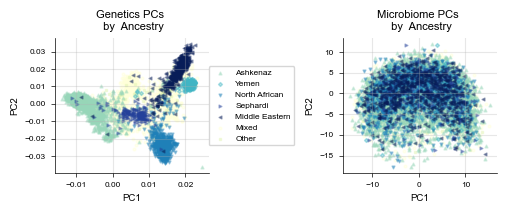

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Generate a random matrix X with 10 samples and 5 features

def do_pca(X,n_components=50):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    pca = PCA(n_components)  # Reduce to 10 principal components
    X_pca = pca.fit_transform(X)
    return X_pca



#mb=mb[mb.index.isin(data.index)]
mb = pd.read_csv('species.csv', index_col=0) ###relative abundances of microbiome species

def clr_transform_log10(df):
    # Compute the mean of each row (axis=1)
    row_mean = df.mean(axis=1)
    # Subtract the row mean from each value to center the data
    clr_df = df.subtract(row_mean, axis=0)
    return clr_df


# Apply the CLR transformation
clr_species = clr_transform_log10(mb)


mb_pca  =do_pca(clr_species)
mb_pca=pd.DataFrame(mb_pca, index=mb.index, columns=['PC'+str(i+1) for i in range(50)])




# Set the style to match Nature Medicine guidelines
plt.style.use('default')
plt.rcParams.update({
    'font.sans-serif': ['Arial'],
    'font.size': 7,
    'axes.linewidth': 0.5,
    'axes.labelsize': 7,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 6,
    'xtick.major.size': 3,
    'ytick.major.size': 3,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'axes.spines.right': False,
    'axes.spines.top': False,
})

ancestry_table = pd.read_csv('country_ancestry.csv')

origin=pd.read_csv('participants_countries_grandparents.csv', index_col=0)

bp_count = origin.apply(pd.Series.value_counts, axis=1)
bp_count = bp_count.reset_index().drop_duplicates().set_index('RegistrationCode')
bp_count = bp_count[~bp_count.index.duplicated(keep=False)]
bp_count = bp_count.stack()
bp_count.index.names = ['RegistrationCode', 'birthplace']
bp_count = bp_count.rename('bp_count').to_frame().reset_index()
bp_to_anc = {i: 'NOT_DEFINED' for i in bp_count['birthplace'].unique().tolist()}
country_heb_ancestry = dict(zip(ancestry_table['country_eng'], ancestry_table['ancestry']))
bp_to_anc.update(country_heb_ancestry)
bp_count['ancestry'] = bp_count['birthplace'].replace(bp_to_anc)
bp_count = bp_count.query("ancestry != 'NOT_DEFINED'")
bp_count = bp_count.set_index(['RegistrationCode', 'ancestry'])['bp_count'].rename('reported')
bp_count = bp_count.groupby(['RegistrationCode', 'ancestry']).sum()
bp_count = bp_count / bp_count.groupby('RegistrationCode').sum()
consistent_ancestry = bp_count[bp_count>0.7]
mixed=bp_count[~bp_count.index.get_level_values(0).isin(consistent_ancestry.index.get_level_values(0))]
#mixed=mixed[mixed.index.get_level_values(0).isin(reg_ids_bm)]
mixed = mixed.reset_index().groupby('RegistrationCode').first()
mixed['ancestry'] = 'Mixed'
consistent_ancestry=consistent_ancestry.reset_index().groupby('RegistrationCode').first()

ancestry=pd.concat([mixed, consistent_ancestry], ignore_index=False)

def create_ylgnbu_color_dict(n):
    """
    Create a dictionary of n colors from the YlGnBu colormap.
    
    Parameters:
    n (int): Number of colors to generate
    
    Returns:
    dict: A dictionary where keys are normalized values (0 to 1) and values are RGB tuples
    """
    cmap = plt.get_cmap('YlGnBu')
    
    # Generate n evenly spaced values between 0 and 1
    values = [i/(n-1) for i in range(n)]
    
    # Create the color dictionary
    color_dict = {i: cmap(value) for i,value in enumerate(values)}
    
    return color_dict


def do_ancestry_scatter(pca_gen, title='', ax=None, show_legend=True):
                        
    categories = [ 'Mixed', 'Other','Ashkenaz', 'Yemen', 'North African', 'Sephardi', 'Middle Eastern', ]
    legend_order = ['Ashkenaz', 'Yemen', 'North African', 'Sephardi', 'Middle Eastern',  'Mixed', 'Other']
   
    ancestry['ancestry']=ancestry['ancestry'].apply(lambda x:'Other' if x=='Unknown/other' else x)
    
    data = pca_gen[['PC1', 'PC2']].join(ancestry['ancestry']).sort_index()
    data = data.dropna()

    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 7))

    num_categories = len(categories)
    color_dict = create_ylgnbu_color_dict(num_categories)
    colors = plt.cm.rainbow(np.linspace(1, 0, num_categories))
    markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h', 'H', '+', 'x', 'd', '|', '_']

    for i, (category, color) in enumerate(zip(categories, colors)):
        subset = data[data['ancestry'] == category]
        ax.scatter(subset['PC1'], subset['PC2'], c=color_dict[i],marker=markers[i % len(markers)], label=category, alpha=0.4, s=4)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'{title} PCs \n by  Ancestry', fontsize=8)

    # Move the legend outside the plot
    if show_legend:
        handles, labels = ax.get_legend_handles_labels()
        ordered_handles = [handles[labels.index(cat)] for cat in legend_order]
        ordered_labels = [cat for cat in legend_order]
        ax.legend(ordered_handles, ordered_labels, loc='center left',bbox_to_anchor=(0.97, 0.5), scatterpoints=1, fontsize=6)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()  # Adjusts the plot to ensure no overlap


fig = plt.figure(figsize=(129 / 25.4 ,55/25.7))

# Create a GridSpec with 2 rows and 2 columns, with the bottom row spanning both columns
gs = GridSpec(2, 4)

# Top-left panel (Panel A)
ax1 = fig.add_subplot(gs[:, :2])

pca_gen=pd.read_csv("pca_gen.csv", index_col=0)  ####file with 10 genetics PCs
pca_gen.index=pca_gen.index.astype(int)
do_ancestry_scatter(pca_gen, 'Genetics', ax=ax1)
# Insert your plot here, e.g., ax1.plot(x, y)

# Top-right panel (Panel B)
ax2 = fig.add_subplot(gs[:, 2:])
do_ancestry_scatter(mb_pca, 'Microbiome', ax=ax2,show_legend=False)

plt.tight_layout()

# Save or show the figure
plt.savefig('10k_genetics_scatter_revision.tiff', dpi=300, format='tiff', bbox_inches='tight')
plt.savefig('10k_genetics_scatter_revision.png', dpi=300, bbox_inches='tight')

In [103]:
mb_pca.join(ancestry['ancestry'])['ancestry'].value_counts()

ancestry
Ashkenaz          5827
Mixed             2596
North African      862
Middle Eastern     723
Sephardi           250
Other              249
Yemen              229
Name: count, dtype: int64

In [101]:
pca_gen.join(ancestry['ancestry'])['ancestry'].value_counts()

ancestry
Ashkenaz          3760
Mixed             1588
North African      574
Middle Eastern     480
Sephardi           176
Yemen              156
Other              148
Name: count, dtype: int64

# Fig 1 e. ancestry predictions and differences

In [4]:
###predictiong an ethnicity from different dataframes (genetics, lifestyle, metabolomics, etc.)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

import pandas as pd

from os.path import join

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

def predict_ancestry(data, ancestry_ser,ethnicity, n_splits=5):
    # Create binary labels for the current batch
    y = (ancestry_ser['ancestry'] == ethnicity).astype(int)
    X = data
    X=X[X.index.isin(y.index)]
    y=y[y.index.isin(X.index)]
    batch_aucs = []

    for _ in range(n_splits):
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        # Train LightGBM model
        model = lgb.LGBMClassifier(num_estimators=1000,random_state=42, num_threads=16)
        model.fit(X_train, y_train)
        # Predict and calculate AUC-ROC
        y_pred = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred)
        batch_aucs.append(auc)
    res = pd.Series({
            'ethnicity': ethnicity,
            'Mean AUC-ROC': np.mean(batch_aucs),
            'Sample Count': sum(y)
        })
 #   res.to_csv(batch+'_pred.csv')
    res=pd.DataFrame()
    res.loc[ethnicity,'Mean AUC-ROC'] = np.mean(batch_aucs)
    res.loc[ethnicity,'STD AUC-ROC'] = np.std(batch_aucs)
    res.loc[ethnicity,'all'] = str(batch_aucs)
    res.loc[ethnicity,'Sample Count'] = sum(y)
    return res


res_all=pd.DataFrame()
res_dna=pd.DataFrame()

ac = ancestry[ancestry.index.isin(pca_gen.index)].sort_index()
ac = ac[~ac['ancestry'].isin(['Mixed', 'Unknown/other'])].sort_index()
for ethn in ['Ashkenaz', 'North African', 'Middle Eastern', 
       'Sephardi', 'Yemen']:
    prediction=predict_ancestry(pca_gen, ac,ethn, n_splits=5)
    print(prediction)
    res_dna=pd.concat([res_dna, predict_ancestry(pca_gen, ac,ethn, n_splits=5)], ignore_index=False)
    
res_dna['source']='dna'
res_all=pd.concat([res_all, res_dna], ignore_index=False)

[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Info] Number of positive: 3001, number of negative: 1234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 4235, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.708619 -> initscore=0.888685
[LightGBM] [Info] Start training from score 0.888685
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Info] Number of positive: 3000, number of negative: 1235
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Ligh

In [5]:

ng = pd.read_csv('nightingale.csv', index_col=0) ###relative abundances of microbiome species

ng.index=ng.index.astype(int)
ng_pca  =do_pca(ng)
ng_pca=pd.DataFrame(ng_pca, index=ng.index, columns=['PC_ng'+str(i+1) for i in range(50)])
res_dna=pd.DataFrame()
for ethn in ['Ashkenaz', 'North African', 'Middle Eastern', 
       'Sephardi', 'Yemen']:
    prediction=predict_ancestry(ng_pca, ac,ethn, n_splits=5)
    print(prediction)
    res_dna=pd.concat([res_dna, prediction], ignore_index=False)
    
res_dna['source']='nightingale'
res_all=pd.concat([res_all, res_dna], ignore_index=False)

[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Info] Number of positive: 2810, number of negative: 1120
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 3930, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.715013 -> initscore=0.919856
[LightGBM] [Info] Start training from score 0.919856
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Info] Number of positive: 2811, number of negative: 1119
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Lig

In [6]:
ls = pd.read_csv('lifestyle.csv', index_col=0) ###relative abundances of microbiome species

ls.index=ls.index.astype(int)
ls=ls.fillna(ls.median(axis=0)).dropna(how='all', axis=1)
ls_pca  =do_pca(ls,min(50,ls.shape[1] ))
ls=ls.dropna(how='all', axis=1)
ls=pd.DataFrame(ls_pca, index=ls.index, columns=['PC_ls_'+str(i+1) for i in range(min(50,ls.shape[1] ))])

res_dna=pd.DataFrame()
for ethn in ['Ashkenaz', 'North African', 'Middle Eastern', 
       'Sephardi', 'Yemen']:
    prediction=predict_ancestry(ls, ac,ethn, n_splits=5)
    print(prediction)
    res_dna=pd.concat([res_dna, prediction], ignore_index=False)
    
res_dna['source']='lifestyle'
res_all=pd.concat([res_all, res_dna], ignore_index=False)

[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Info] Number of positive: 2145, number of negative: 839
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 2984, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.718834 -> initscore=0.938684
[LightGBM] [Info] Start training from score 0.938684
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Info] Number of positive: 2147, number of negative: 837
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Light

In [7]:

res_dna = pd.DataFrame()
for ethn in ['Ashkenaz', 'North African', 'Middle Eastern',
             'Sephardi', 'Yemen']:
    prediction = predict_ancestry(mb_pca, ac, ethn, n_splits=5)
    res_dna = pd.concat([res_dna, prediction], ignore_index=False)

res_dna['source'] = 'microbiome'
res_all = pd.concat([res_all, res_dna], ignore_index=False)

[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Info] Number of positive: 2875, number of negative: 1172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 4047, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710403 -> initscore=0.897341
[LightGBM] [Info] Start training from score 0.897341
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Info] Number of positive: 2870, number of negative: 1177
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Lig

In [8]:
res_all

,Mean AUC-ROC,STD AUC-ROC,all,Sample Count,source
Ashkenaz,0.984775,0.005598,"[0.9756654824425909, 0.9896374601768404, 0.981...",3760.0,dna
North African,0.998841,0.000252,"[0.9984985261606486, 0.99926865835375, 0.99880...",574.0,dna
Middle Eastern,0.994530,0.001929,"[0.9920553464857262, 0.997899827445282, 0.9938...",480.0,dna
Sephardi,0.969871,0.014999,"[0.9418204897656951, 0.9865393769503358, 0.971...",176.0,dna
Yemen,0.999359,0.000654,"[0.9982142857142857, 0.9992826398852224, 1.0, ...",156.0,dna
Ashkenaz,0.617401,0.004676,"[0.6157500295054881, 0.6142817877511755, 0.611...",3497.0,nightingale
North African,0.565368,0.024296,"[0.5552730851238314, 0.5687866765848417, 0.565...",524.0,nightingale
Middle Eastern,0.585884,0.027439,"[0.548718152444515, 0.575098814229249, 0.58582...",439.0,nightingale
Sephardi,0.489839,0.030074,"[0.48800667982389556, 0.544128646222887, 0.485...",166.0,nightingale
Yemen,0.613088,0.051278,"[0.56993006993007, 0.5362900310850864, 0.64405...",149.0,nightingale


In [9]:
mb_pca=mb_pca.rename({col:'MB'+col for col in mb_pca.columns})

combined=ls.join(mb_pca).join(ng_pca)
for ethn in ['Ashkenaz', 'North African', 'Middle Eastern',
             'Sephardi', 'Yemen']:
    prediction = predict_ancestry(combined, ac, ethn, n_splits=5)
    print(prediction)
    res_dna = pd.concat([res_dna, prediction], ignore_index=False)

res_dna['source'] = 'combined'
res_all = pd.concat([res_all, res_dna], ignore_index=False)

[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Info] Number of positive: 2156, number of negative: 828
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38250
[LightGBM] [Info] Number of data points in the train set: 2984, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.722520 -> initscore=0.956997
[LightGBM] [Info] Start training from score 0.956997
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Warning] Unknown parameter: num_estimators
[LightGBM] [Info] Number of positive: 2161, number of negative: 823
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Ligh

In [99]:
res_all.round(3).to_csv('Prediction_results_ethnicity.csv')

age 0.5323966873512679
gender 0.6930053282772826
bmi 0.40307715418550805


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

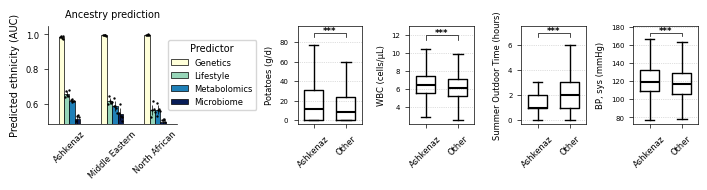

In [80]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
from scipy import stats

def boxplot_with_mannwhitney_final(data1, data2, labels, title, ax=None, save=True, short=False):
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(data1, data2)
    
    if ax is None:
        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(180 / 25.4 / 6 * 1.3, 2), dpi=300)
    
    # Create the boxplot
    bp = ax.boxplot([data1, data2], labels=labels, showfliers=False, widths=0.6)
    
    # Customize the plot
    ax.set_ylabel(title, fontsize=6)
    ax.set_xlabel('', fontsize=6)

    # Set style for median lines
    for median in bp['medians']:
        median.set(color='black', linewidth=1.5)
    
    # Set style for whiskers and caps
    for element in ['whiskers', 'caps']:
        for item in bp[element]:
            item.set(color='black', linewidth=1)
    
    # Find the highest point of the boxes (excluding outliers)
    y_max = max(
        max(bp['boxes'][0].get_ydata()),
        max(bp['boxes'][1].get_ydata()),
        max(bp['caps'][1].get_ydata()),
        max(bp['caps'][3].get_ydata())
    )
    
    # Add asterisks based on the p-value
    if short:
        annotation_height = y_max+ (y_max * 0.04)
        line_height = y_max + (y_max * 0.02)
    else:
        annotation_height = y_max + (y_max * 0.15)  # Move p-value annotation lower (15% above the highest point)
        line_height = y_max + (y_max * 0.1)  # Move line lower (10% above the highest point)
    
    if p_value < 0.001:
        annotation = '***'  # p < 0.001
    elif p_value < 0.01:
        annotation = '**'   # p < 0.01
    elif p_value < 0.05:
        annotation = '*'    # p < 0.05
    else:
        annotation = 'n.s.'  # not significant
    
    # Display the asterisks above the boxes
    ax.text(1.5, annotation_height, annotation,  # Use the adjusted height for annotation
            horizontalalignment='center', fontweight='bold', fontsize=6)
    
    # Add a line connecting the boxes
    x1, x2 = 1, 2
    ax.plot([x1, x1, x2, x2], [line_height, annotation_height, annotation_height, line_height], lw=0.5, c='black')
    
    # Adjust y-axis to make room for the annotation
    if short:
        ax.set_ylim(top=annotation_height + (y_max * 0.05))
    else:
        ax.set_ylim(top=annotation_height + (y_max * 0.1))  # Reduce space above the annotation (10% more space)
    
    # Set background color and frame
    ax.set_facecolor('white')
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(0.5)
    
    # Add grid
    ax.grid(True, axis='y', linestyle=':', color='gray', alpha=0.5, linewidth=0.5)
    
    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=5, length=3, width=0.5)
    plt.xticks(rotation=45)
    ax.set_xticklabels(labels, fontweight='normal', fontsize=6)
    
    plt.tight_layout()
    
    if save:
        plt.savefig('/genetics/{}.png'.format(title[:5]),
                    dpi=300, bbox_inches='tight')

import pandas as pd
import numpy as np
from scipy import stats
def calculate_significance(group1, group2):
    t_stat, p_value = stats.ttest_ind(group1, group2)
    return p_value
# Set the style to match Nature Medicine guidelines
plt.style.use('default')
plt.rcParams.update({
 'font.sans-serif': ['Helvetica'],
    'font.size': 7,
    'axes.linewidth': 0.5,
    'axes.labelsize': 7,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 6,
    'xtick.major.size': 3,
    'ytick.major.size': 3,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'axes.spines.right': False,
    'axes.spines.top': False,
})

fig = plt.figure(figsize=(180 / 25.4,2))

# Create a GridSpec with 2 rows and 2 columns, with the bottom row spanning both columns

gs = gridspec.GridSpec(1, 6, width_ratios=[2,0.4, 1, 1, 1, 1])
# Top-left panel (Panel A)



results=res_all.reset_index().groupby(['index', 'source'])['Mean AUC-ROC'].first().unstack()
std=res_all.reset_index().groupby(['index', 'source'])['STD AUC-ROC'].first().unstack()
dots=res_all.reset_index().groupby(['index', 'source'])['all'].first().unstack()
# Bottom panel (Panel C, wider)
ax3 = fig.add_subplot(gs[0, 0])  # First column (wider)
#ax3.set_title('Panel C')
results_cols={'dna':'Genetics', 'lifestyle':'Lifestyle', 'nightingale':'Metabolomics',
              'nutr_all':'Nutrition', 'microbiome':'Microbiome', 'bt_data':'Blood Tests'}
std=std[['dna', 'lifestyle', 'nightingale', 'microbiome']].loc[['Ashkenaz', 'Middle Eastern', 'North African']].rename(columns=results_cols)

dots=dots[['dna', 'lifestyle', 'nightingale', 'microbiome']].loc[['Ashkenaz', 'Middle Eastern', 'North African']].rename(columns=results_cols)

results=results[['dna', 'lifestyle', 'nightingale', 'microbiome']].loc[['Ashkenaz', 'Middle Eastern', 'North African']].rename(columns=results_cols)

#std=std[['dna', 'lifestyle', 'nightingale', 'microbiome']].loc[['Ashkenaz', 'Middle Eastern', 'North African']].rename(columns=results_cols)
error_config = {'elinewidth': 0.5}
results.plot(kind='bar',ax=ax3, yerr=std, cmap='YlGnBu', edgecolor='black', linewidth=0.5,error_kw=error_config)

error_config = {"ecolor": "black", "capsize": 3}

# Create the bar plot
bar_width = 0.5 / len(results.columns)  # Adjust width based on the number of columns
x_positions = np.arange(len(results.index))  # Positions for each group of bars

# Loop through columns to create grouped bars


# Overlay dots
for i, index in enumerate(results.index):
    for j, col in enumerate(results.columns):
        x_dot = x_positions[i] + j * bar_width + bar_width / 2  # Bar center
        y_dots = eval(dots.loc[index, col])
        for ii, y_dot in enumerate(y_dots):# Get the dot value for the specific index and column
            ax3.scatter(x_dot-0.02*ii-0.2, y_dot, color="black", zorder=2,s=0.5)  



ax3.set_ylabel('Predicted ethnicity (AUC)')
ax3.set_xlabel('')
ax3.set_ylim(0.48, 1.05)

ax3.tick_params(axis='x', rotation=45)
ax3.set_title('Ancestry prediction', fontsize=7)


ax3.tick_params(axis='x', length=0)



###creating a matched 1x1 cohort of ashkenaz vs not azhkenaz
from utils import find_match

basic_data=pd.read_csv('basic_data.csv', index_col=0) ###age, gender, bmi


ancestry['is_achkenaz'] = ancestry['ancestry']=='Ashkenaz'
ancestry=ancestry[ancestry.index.isin(basic_data.index)]
not_mixed=ancestry[~ancestry['ancestry'].isin(['Unknown/other', 'Mixed'])]
shak_ind = ancestry[ancestry['is_achkenaz']].index
not_shak_ind = not_mixed[~not_mixed['is_achkenaz']].index
shak_data=basic_data.loc[shak_ind].dropna()
shak_data['not_ashkenaz']=False
not_shak_data=basic_data.loc[not_shak_ind].dropna()
not_shak_data['not_ashkenaz']=True
df=pd.concat([shak_data,not_shak_data], ignore_index=False)

matched_df = find_match(df,TREATMENT='not_ashkenaz', koef=1)
shak_ind=matched_df[matched_df['not_ashkenaz']==False].index
not_shak_ind=matched_df[matched_df['not_ashkenaz']].index
for col in ['age', 'gender', 'bmi']:
    print(col, calculate_significance(basic_data.loc[shak_ind][col].dropna(), basic_data.loc[not_shak_ind][col].dropna()))



res_df= pd.read_csv('all_measurements_for_genetics.csv', index_col=0).rename(columns={'Potatoes':"Potatoes,g/d"})
res_df=res_df[res_df.index.isin(shak_ind.append(not_shak_ind))]
res_df['ashk']=res_df.index.isin(shak_ind)
res_df=res_df.rename(columns={'bt__wbc':"WBC (cells/µL)"})

res_df=res_df.rename(columns={'hours_outdoors_summer':'Summer Outdoor Time (hours)'})
res_df=res_df.rename(columns={'sitting_blood_pressure_systolic':'BP, sys (mmHg)', 'Potatoes,g/d':'Potatoes (g/d)'})




for i,col in enumerate(['Potatoes (g/d)', 'WBC (cells/µL)', 'Summer Outdoor Time (hours)',
       'BP, sys (mmHg)']):
    if col in ['BP, sys (mmHg)']:
        short=True
    else:
        short=False
    ax = fig.add_subplot(gs[0, i+2])
    boxplot_with_mannwhitney_final(res_df[res_df['ashk']][col].dropna().values,
                res_df[~res_df['ashk']][col].dropna().values, ['Ashkenaz', 'Other'], col, ax=ax, short=short, save=False)

ax3.legend(loc='center left', bbox_to_anchor=(0.9, 0.5),fontsize=6, title="Predictor")
plt.subplots_adjust(left=0.05, right=3, top=0.2, bottom=0.1, wspace=0.15)
plt.tight_layout()

# Save or show the figure
plt.savefig('10k_predicting_ethnicity_all_revision.png', dpi=300, bbox_inches='tight')

In [98]:
from utils import compare_2_groups
comparison_table_phenotype=compare_2_groups(res_df, shak_ind, not_shak_ind, group1_name='Ashkenazi',
                                   group2_name='Other')
comparison_table_phenotype.round(3).to_csv('comparison_table_phenotype_ashkenazi_other.csv')

In [96]:
from utils import compare_2_groups
comparison_table_basic=compare_2_groups(basic_data, shak_ind, not_shak_ind, group1_name='Ashkenazi',
                                   group2_name='Other')
comparison_table_basic.round(3).to_csv('basic_data_after_matching.csv')

In [92]:
basic_data.join(ancestry['ancestry']).groupby('ancestry').describe().T

ancestry         Ashkenaz  Middle Eastern        Mixed  North African  \
age    count  6270.000000      780.000000  2852.000000     943.000000   
       mean     51.284689       52.969231    48.252805      51.386002   
       std       8.677439        8.156781     8.800942       8.157389   
       min       0.000000       26.000000    18.000000      25.000000   
       25%      45.000000       47.000000    43.000000      45.000000   
       50%      50.000000       53.000000    48.000000      51.000000   
       75%      57.000000       59.000000    54.000000      57.000000   
       max      81.000000       71.000000    72.000000      71.000000   
gender count  6243.000000      775.000000  2845.000000     941.000000   
       mean      0.447221        0.483871     0.477329       0.475027   
       std       0.497246        0.500063     0.499574       0.499641   
       min       0.000000        0.000000     0.000000       0.000000   
       25%       0.000000        0.000000     0.000000       0.000000   
       50%       0.000000        0.000000     0.000000       0.000000   
       75%       1.000000        1.000000     1.000000       1.000000   
       max       1.000000        1.000000     1.000000       1.000000   
bmi    count  6261.000000      778.000000  2848.000000     943.000000   
       mean     26.036900       25.982088    25.616209      26.543225   
       std       4.183760        3.964083     4.118141       4.255199   
       min      16.119251       17.501600    15.346939      17.148804   
       25%      23.019829       23.116569    22.753274      23.563332   
       50%      25.464722       25.616426    25.108269      26.152668   
       75%      28.408184       28.207774    27.950642      28.882792   
       max      45.908722       41.420120    47.238045      43.082867   

ancestry           Other    Sephardi       Yemen  
age    count  302.000000  264.000000  249.000000  
       mean    46.665563   54.416667   52.285141  
       std     12.257918    8.186553    8.039909  
       min     19.000000   32.000000   25.000000  
       25%     41.000000   48.000000   46.000000  
       50%     48.000000   53.000000   51.000000  
       75%     55.000000   61.000000   58.000000  
       max     70.000000   74.000000   71.000000  
gender count  302.000000  264.000000  248.000000  
       mean     0.440397    0.443182    0.451613  
       std      0.497259    0.497705    0.498660  
       min      0.000000    0.000000    0.000000  
       25%      0.000000    0.000000    0.000000  
       50%      0.000000    0.000000    0.000000  
       75%      1.000000    1.000000    1.000000  
       max      1.000000    1.000000    1.000000  
bmi    count  301.000000  263.000000  248.000000  
       mean    25.724288   27.078499   26.069136  
       std      4.187991    4.441876    4.085290  
       min     17.067661   18.662964   17.779881  
       25%     22.746599   23.832353   23.452404  
       50%     25.165113   26.372459   25.492681  
       75%     28.279469   30.010199   28.111740  
       max     39.453125   41.042732   40.629288

In [95]:
basic_data_split=basic_data.join(ancestry['ancestry']).groupby('ancestry').describe().T

basic_data_split[basic_data_split.index.get_level_values(1).isin(['count', 'mean', 'std'])].round(3).to_csv('basic_data_by_ethnicity.csv')

In [76]:
plt.savefig('10k_predicting_ethnicity_all_revision.png', dpi=300, bbox_inches='tight')
from utils import compare_2_groups

comparison_table_phenotype = compare_2_groups(res_df, shak_ind, not_shak_ind, group1_name='Ashkenazi',
                                              group2_name='Other')
comparison_table_phenotype.to_csv('comparison_table_phenotype_ashkenazi_other.csv')

In [18]:
import random
import numpy as np
import pandas as pd
import math
import random
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import shap
import matplotlib.pyplot as plt
import matplotlib
def find_match1(df, TREATMENT='treatment', koef=2):
    random.seed(42)
    df[TREATMENT] = df[TREATMENT].astype(bool)
    if 'gender' in df.columns:
        df['gender'] = df['gender'].astype(bool)
    t = df[TREATMENT].astype(float).dropna()
    X = pd.get_dummies(df.drop(columns=[TREATMENT])).astype(float).dropna()
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('logistic_classifier', LogisticRegression())
    ])
    pipe.fit(X, t)
    threshold = 0.5
    df['proba'] = pipe.predict_proba(X)[:,1]
    df['logit'] = df['proba'].apply(lambda p: np.log(p/(1-p)))
    df['pred'] = np.where(df['proba']>=threshold, 1, 0)
    # Sort by 'logit' so it's quicker to find match
    df.sort_values('logit', inplace=True)
    matched_df = pd.DataFrame()
    df_not_treated=df[df[TREATMENT]==False]
    n = len(df)-1
    if koef<1:
        skip_chance= 1-koef
        koef=1
    else:
        skip_chance=0
    for i, (ind, row) in enumerate(df.iterrows()):
        # Match the most similar untreated record to each treated record
        if row[TREATMENT]:
            if random.random()<skip_chance:
                matched_df = pd.concat([matched_df, row], ignore_index=False)
                continue
            s = row.loc['logit']
            matched_neighbours_df = df_not_treated.iloc[(df_not_treated['logit']-s).abs().argsort()[:koef]]
            matched_neighbours_df['match'] = ind
           # print(matched_neighbours_df)
            matched_df = pd.concat([matched_df, matched_neighbours_df], ignore_index=False)
            matched_df = pd.concat([matched_df, pd.DataFrame(row).T], ignore_index=False)
            df_not_treated = df_not_treated[~df_not_treated.index.isin(matched_neighbours_df.index)]
    return matched_df


mdf2=find_match1(df,TREATMENT='not_ashkenaz', koef=1)

In [19]:
mdf2

,age,gender,bmi,not_ashkenaz,proba,logit,pred,match
5895,27.0,False,31.427155,False,0.268811,-1.000661,0,5795.0
5795,26.0,False,30.429688,True,0.268383,-1.00284,0,NaN
1955,26.0,False,28.523733,False,0.268816,-1.000637,0,1875.0
1875,27.0,False,29.693487,True,0.26854,-1.002043,0,NaN
10634,29.0,False,29.921875,False,0.268893,-1.000249,0,8995.0
...,...,...,...,...,...,...,...,...
11265,66.0,True,36.733204,True,0.388719,-0.452702,0,NaN
2167,54.0,True,42.448978,False,0.397143,-0.417385,0,9250.0
9250,69.0,True,36.2449,True,0.394913,-0.426709,0,NaN
10511,69.0,True,35.827389,False,0.391222,-0.442179,0,8341.0


In [109]:
comparison_table_phenotype[comparison_table_phenotype.index.str.contains('vities')]

,Ashkenazi size,Other size,Ashkenazi mean,Ashkenazi std,Other mean,Other std,ttest_pvalue,mw_pvalue,fdr_mw
attend_activities_once_a_week__Pub or social club,1832,1774,0.087882,0.283201,0.132469,0.339096,0.000018,0.000019,0.000183
"activities_type__אף אחד מהנ""ל",1832,1774,0.038755,0.193064,0.061443,0.240209,0.001756,0.001765,0.009773
activities_type__Strenuous exercise,1832,1774,0.543668,0.498225,0.492672,0.500087,0.002177,0.002187,0.011444
activities_type__(Walking for pleasure (not to move from place to place,1832,1774,0.698144,0.459188,0.658963,0.474192,0.011753,0.011773,0.045426
activities_type__prefer not to answer,1832,1774,0.0,0.0,0.001691,0.0411,0.0783,0.078356,0.200886
activities_type__no,1832,1774,0.263646,0.44073,0.240135,0.427286,0.104101,0.104097,0.252477
activities_type__Walk,1832,1774,0.263646,0.44073,0.240135,0.427286,0.104101,0.104097,0.252477
attend_activities_once_a_week__Sports club or gym,1832,1774,0.4869,0.499965,0.460541,0.498581,0.11308,0.113072,0.266627
attend_activities_once_a_week__no,1832,1774,0.0,0.0,0.000564,0.023742,0.309593,0.309791,0.545346
"activities_type__Routine activity that requires light physical exertion (such as watering, pruning",1832,1774,0.370087,0.48296,0.354566,0.478516,0.332512,0.332453,0.549771
